33.82946785505415
76.084549
1.63339


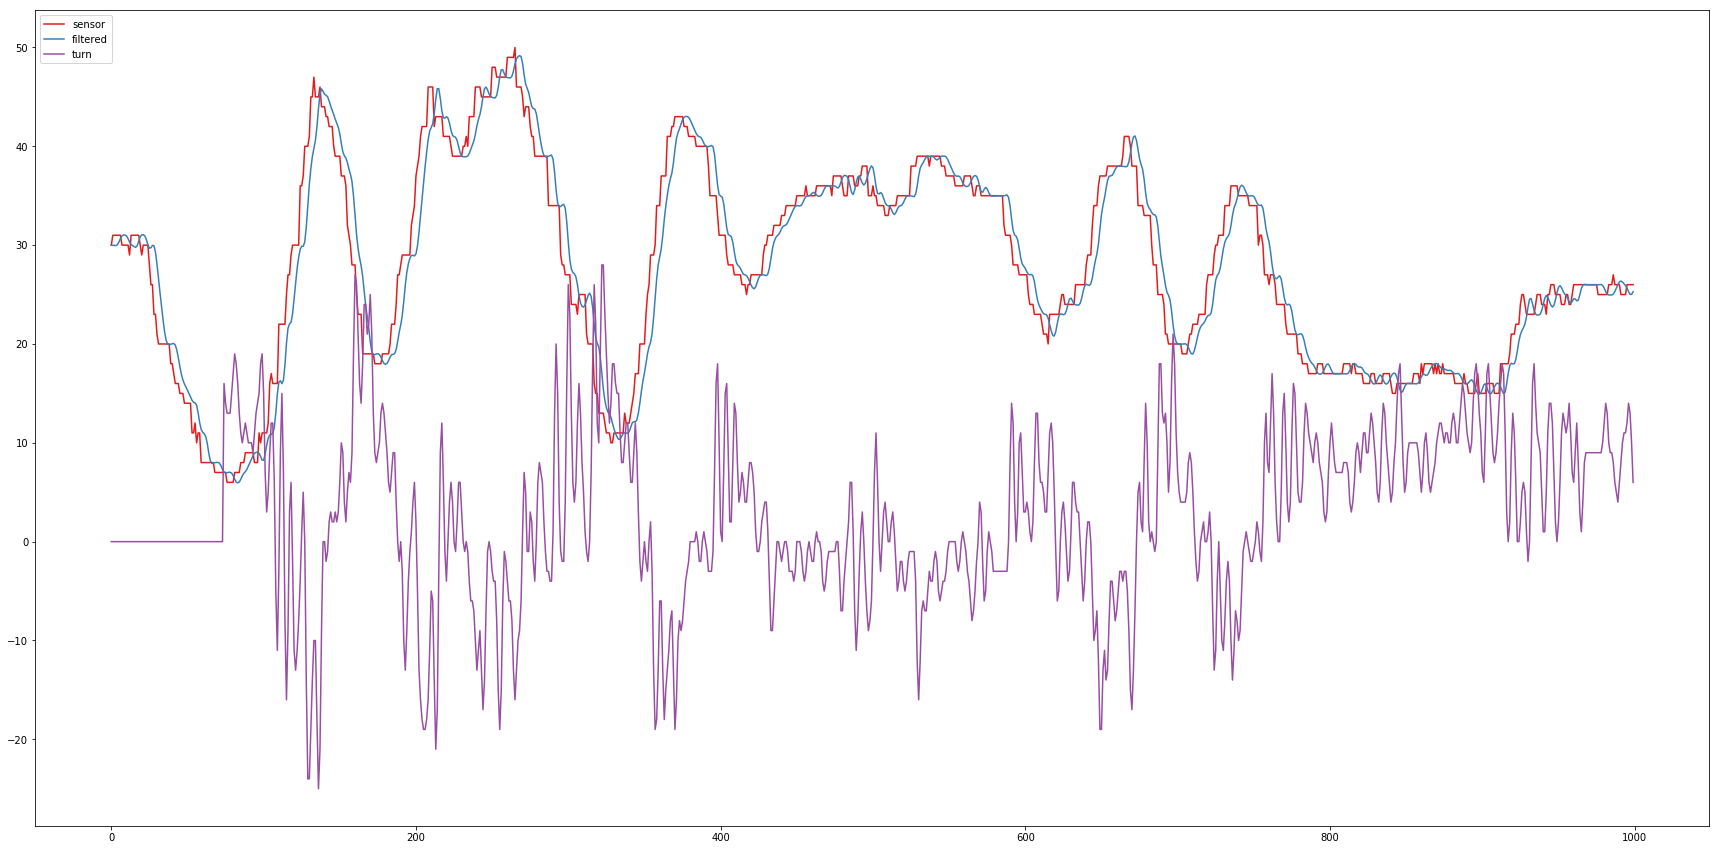

In [2]:
import matplotlib.pyplot as plt
import numpy as np
#0 : sensor
#1 : filtered
#2 : forward
#3 : turn 
#4 : gyro
#5 : left motor angle
#6 : right motor angle
#7 : voltage
#8 : left motor pwm
#9 : right motor pwm

file = open("courseL_1_3.txt")
file_lines = file.readlines()
filtered_value = []
filter_value = []
foward_value = []
turn_value = []
gyro_value = []
left_motor_value = []
right_motor_value = []
voltage_value = []
left_motor_pwm = []
right_motor_pwm = []

colorlist = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf' , '#ff00ff', '#00ff00']

for line in file_lines:
    filter_value.append(float(line.replace("\n", "").split(",")[0]))
    filtered_value.append(float(line.replace("\n", "").split(",")[1]))
    foward_value.append(float(line.replace("\n", "").split(",")[2]))
    turn_value.append(float(line.replace("\n", "").split(",")[3]))
    gyro_value.append(float(line.replace("\n", "").split(",")[4]))
    left_motor_value.append(float(line.replace("\n", "").split(",")[5]))
    right_motor_value.append(float(line.replace("\n", "").split(",")[6]))
    voltage_value.append(float(line.replace("\n", "").split(",")[7]))
    left_motor_pwm.append(float(line.replace("\n", "").split(",")[8]))
    right_motor_pwm.append(float(line.replace("\n", "").split(",")[9]))

print(np.average(filtered_value))
print(np.max(filtered_value))
print(np.min(filtered_value))
plt.figure(figsize=(30, 15))
plt.plot(filter_value[0:1000],color=colorlist[0], label="sensor")
plt.plot(filtered_value[0:1000],color=colorlist[1], label="filtered")
plt.plot(turn_value[0:1000],color=colorlist[3], label="turn")
plt.legend(loc="upper left")
plt.show()

#Turn の値がぶれる理由
#1 : PIDのパラメーター？＝＞可能性低い？
    # => 限界感度法で合わせていく
    # -優先度低い。
#2 : カラーの値がぶれているからTurn のぶれている => 可能性大？
    # =>　フィルタの原因ではなさそうだが、ぶれが生じている。
    # => 正規化による値の範囲を狭める。
    # => MIN, MAXの値の範囲が広いせい？
    # => 正規化が必要？
    # -優先度高くして調査必要
#3 : バランサ(倒立振り子) -> 4msecで動かす必要がある
    # => カラーセンサも4msecでとる必要がある？
    # => PIDの計算も4msecで必要なくなる？
    # => 計算の周期を変更させる
    #- 優先度高くして調査

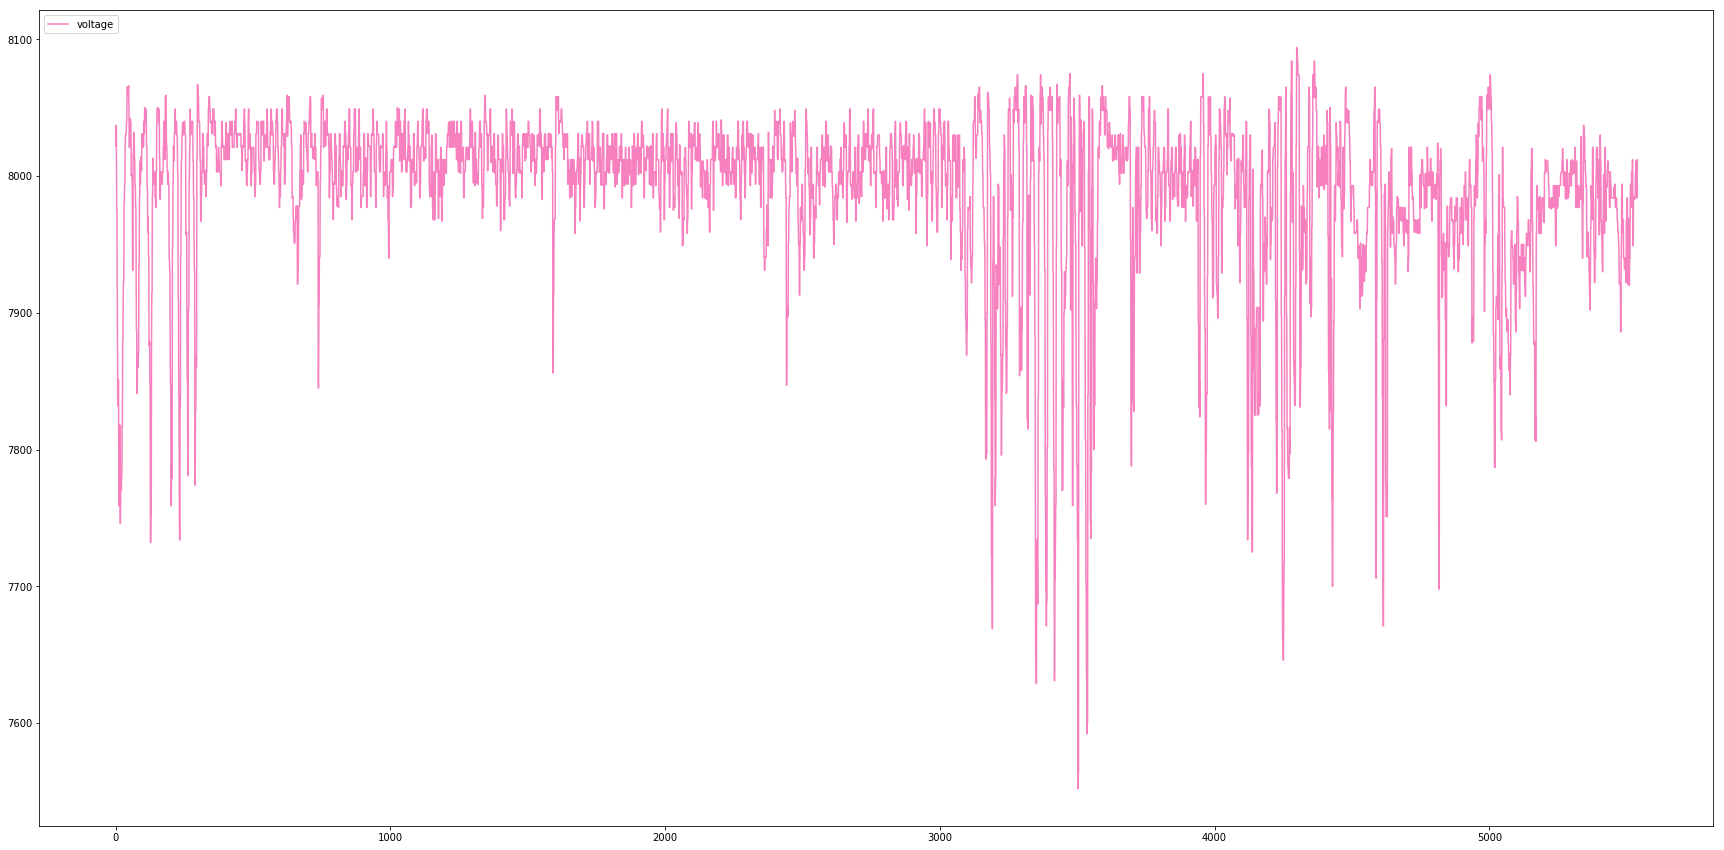

In [3]:
plt.figure(figsize=(30, 15))
plt.plot(voltage_value,color=colorlist[7], label="voltage")
plt.legend(loc = 'upper left')
plt.show()
#特に問題はない？

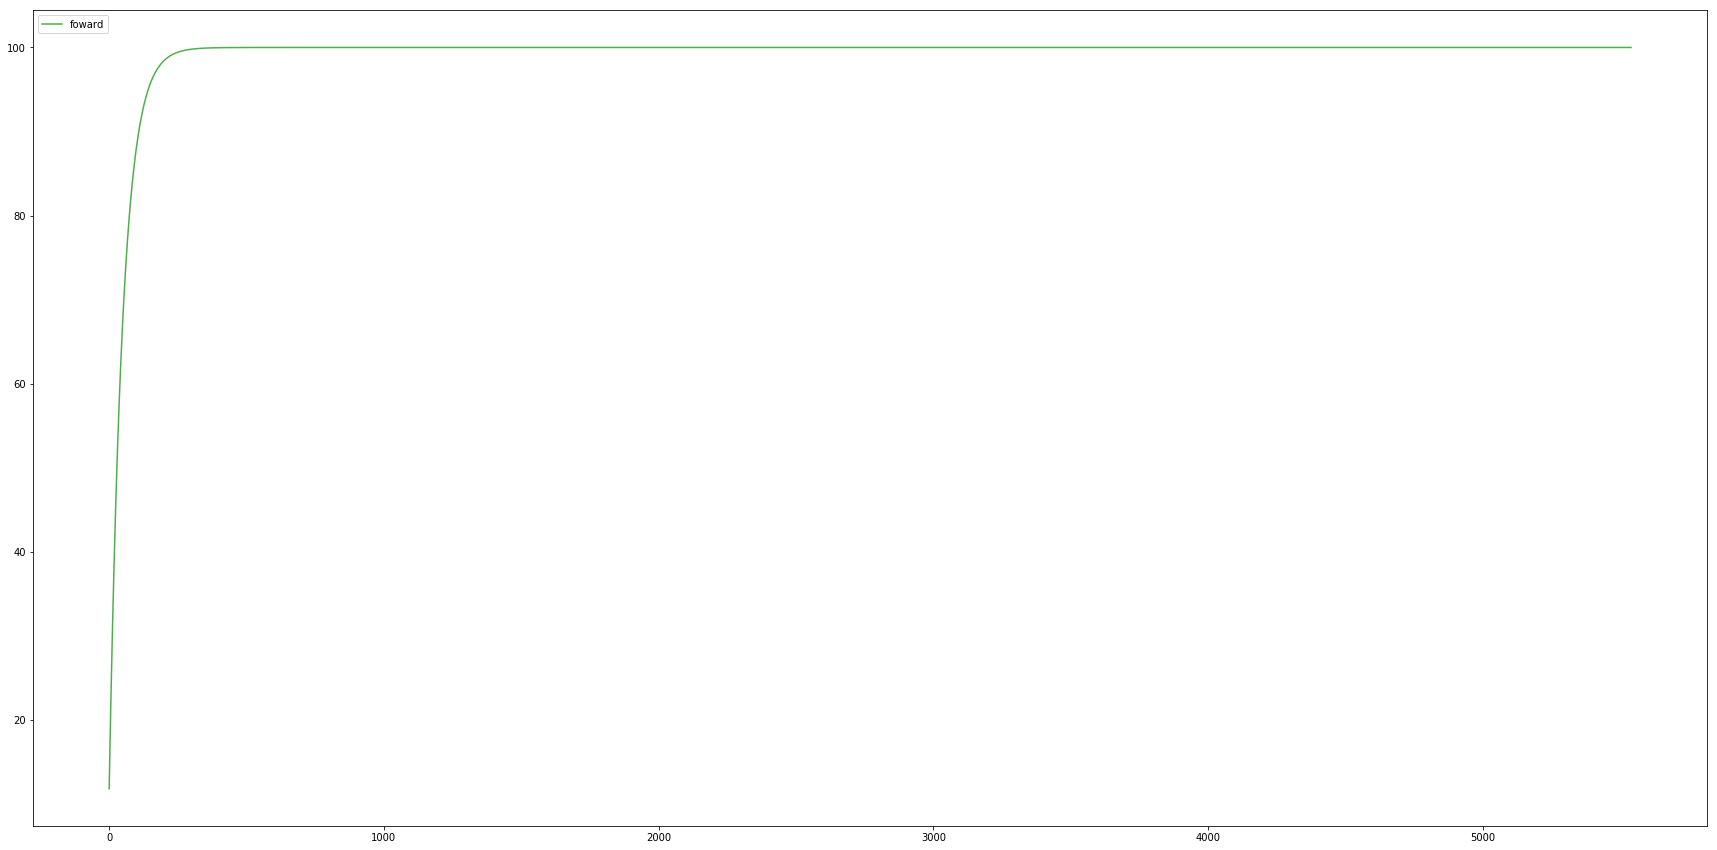

In [5]:
plt.figure(figsize=(30, 15))
# plt.plot(foward_value[0:20],color=colorlist[2], label="foward")
plt.plot(foward_value,color=colorlist[2], label="foward")
plt.legend(loc = 'upper left')
plt.show()
#フォワードをもう少しゆっくり上げたほうが良いか？
#優先度高い

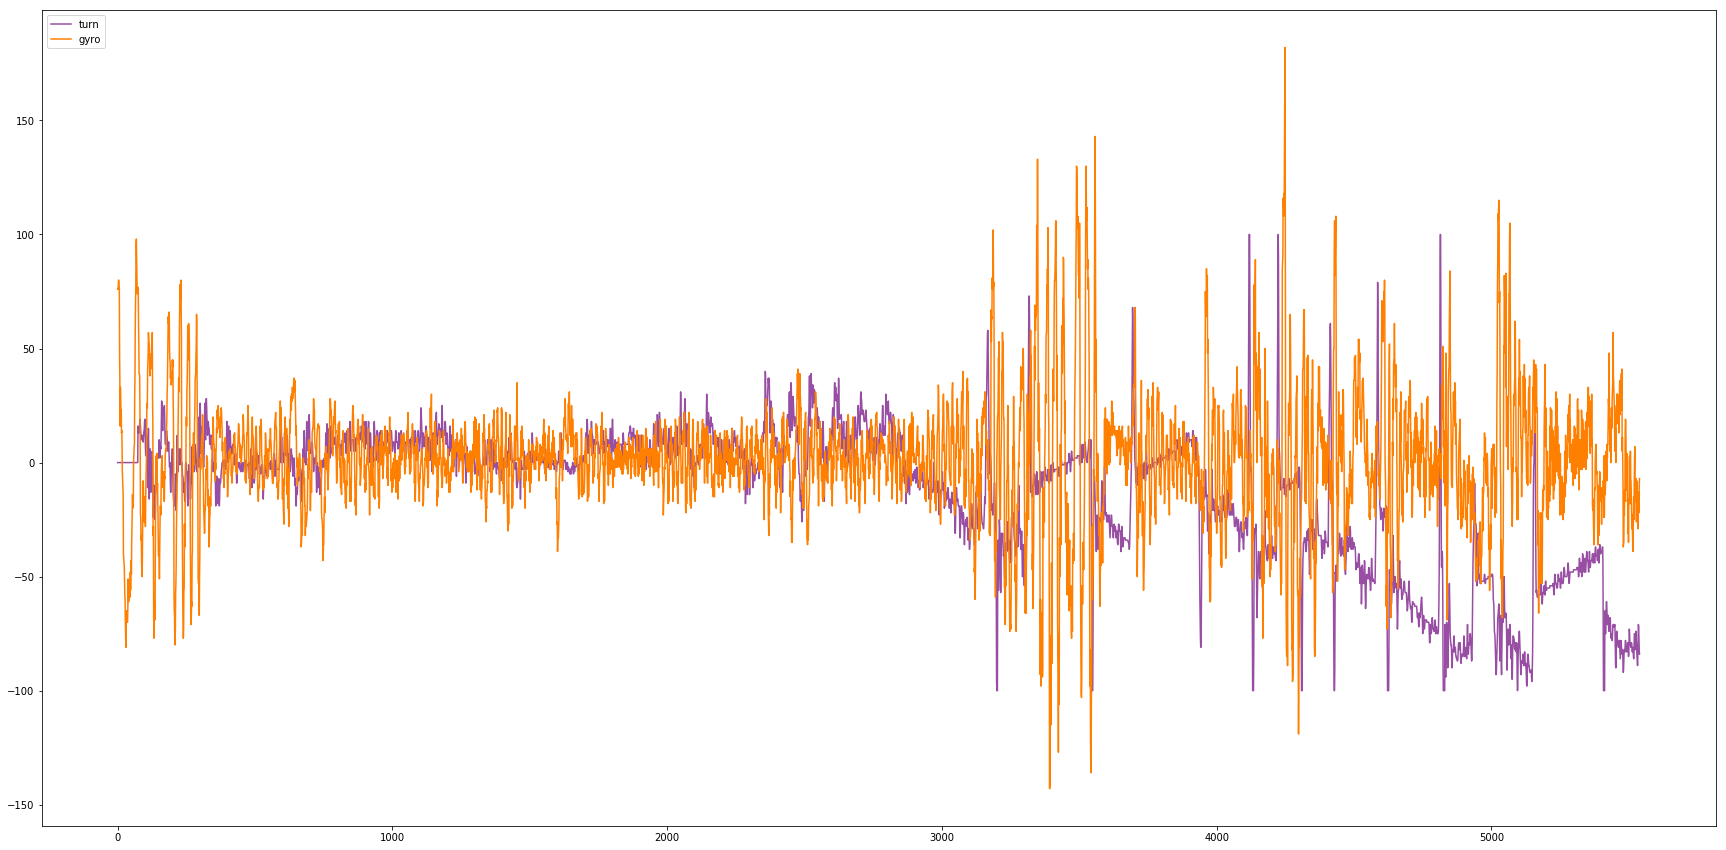

In [6]:
plt.figure(figsize=(30, 15))
plt.plot(turn_value,color=colorlist[3], label="turn")
plt.plot(gyro_value,color=colorlist[4], label="gyro")
plt.legend(loc = 'upper left')
plt.show()
#Gyroによる振動を変えることができる？
#GYROに対する処理を行っていない。
#GYROに対する処理が必要か？
    #サーチが必要！！！
    #優先度中くらい

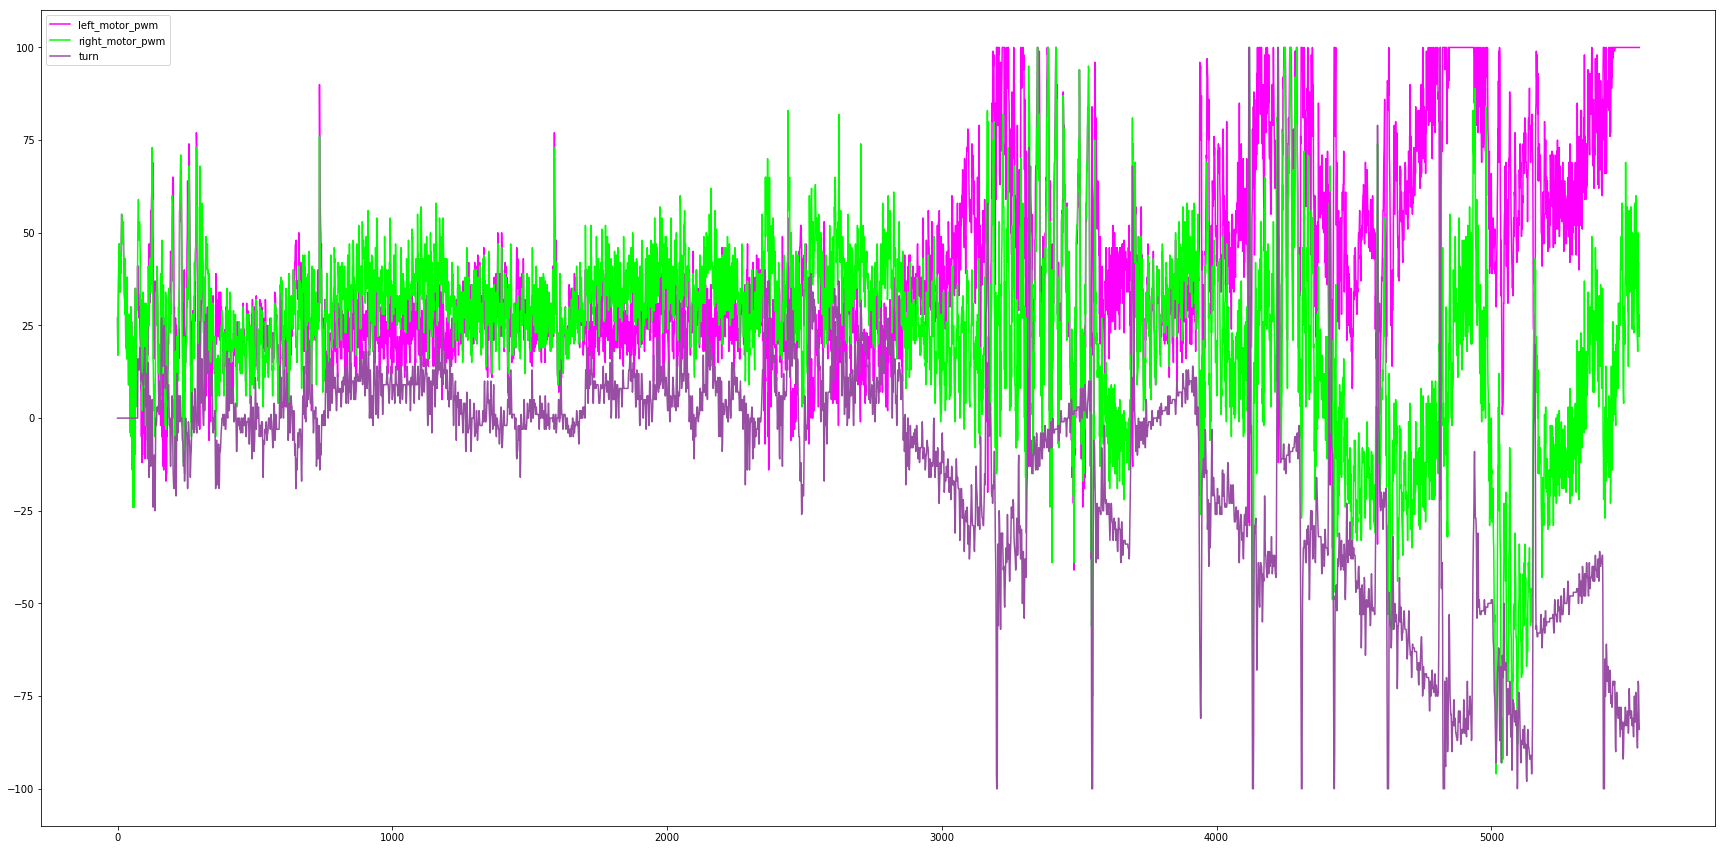

In [7]:
plt.figure(figsize=(30, 15))
plt.plot(left_motor_pwm,color=colorlist[8], label="left_motor_pwm")
plt.plot(right_motor_pwm,color=colorlist[9], label="right_motor_pwm")
plt.plot(turn_value,color=colorlist[3], label="turn")
plt.legend(loc = 'upper left')
plt.show()
#処理がないが必要か？
#サーチが必要!!!
#優先度低い・

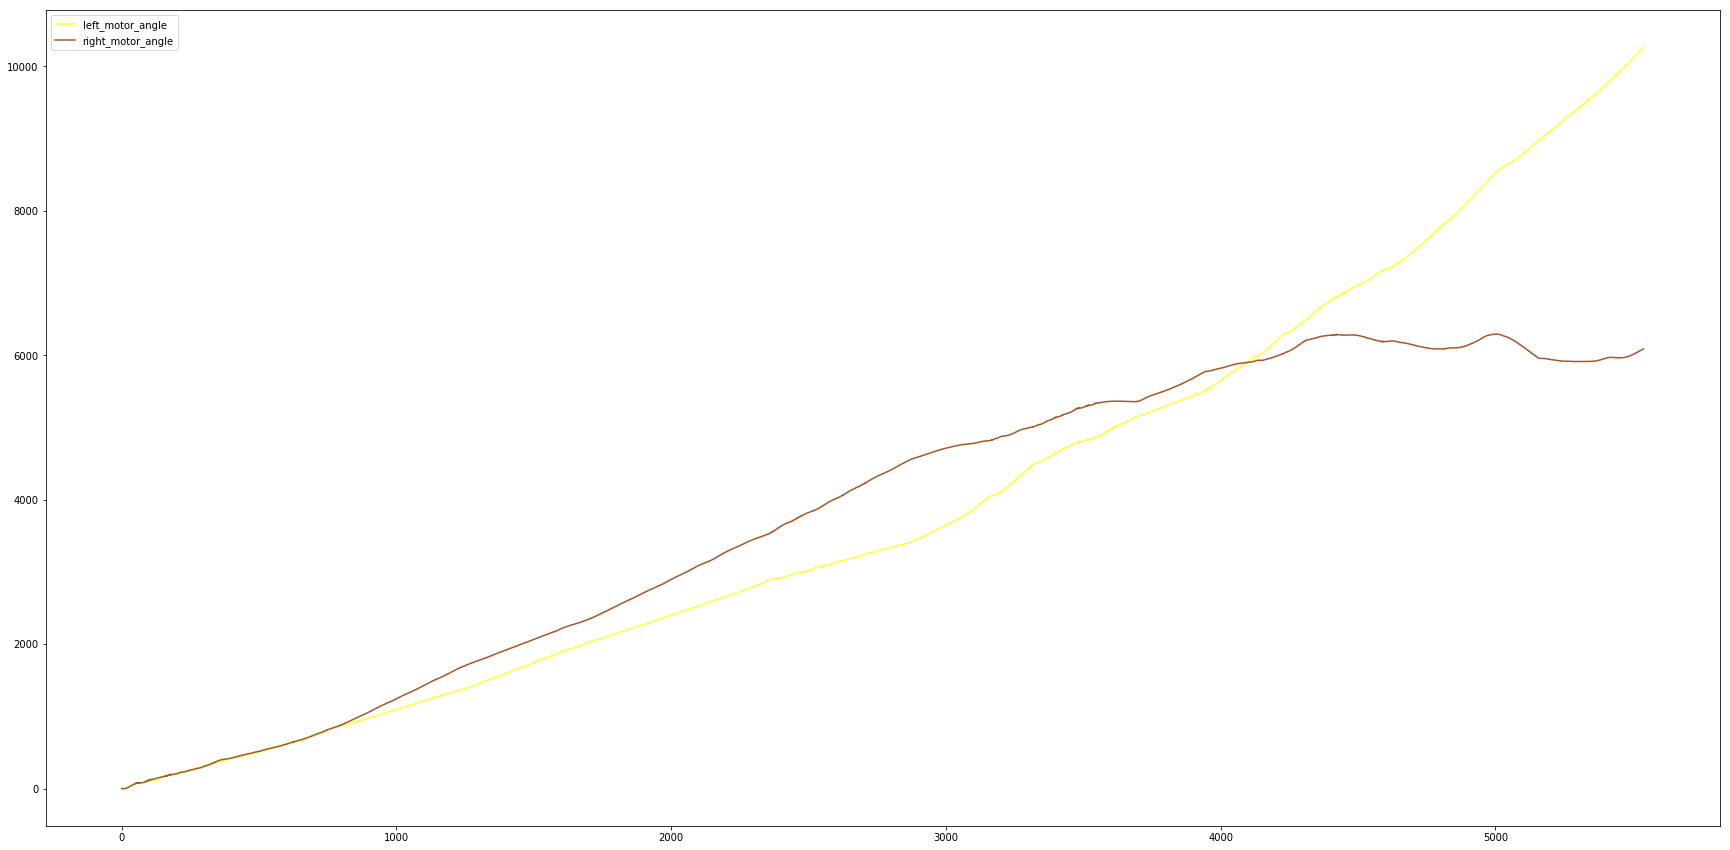

In [8]:
plt.figure(figsize=(30, 15))
plt.plot(left_motor_value,color=colorlist[5], label="left_motor_angle")
plt.plot(right_motor_value,color=colorlist[6], label="right_motor_angle")
plt.legend(loc = 'upper left')
plt.show()
#謎が存在
#左右で一致してない！！！
#何で！？！？！？！？
#くるくる回っているから問題はなさそうかも！
#右モーターと左モーターでずれがあったときに合わせることは可能か？
#優先度低い

In [24]:
file.readlines()

[]